In [9]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF

## 4(b)

In [10]:
# Set up the data array
expo5 = [np.random.exponential(3) for i in range(5)]
expo20 = [np.random.exponential(3) for i in range(20)]
expo500 = [np.random.exponential(3) for i in range(500)]

In [11]:
# Use ECDF method to generate the emperical cdf 
ecdf5 = ECDF(expo5)
ecdf20 = ECDF(expo20)
ecdf500 = ECDF(expo500)

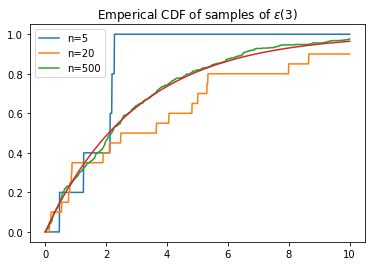

In [12]:
x_space = np.linspace(0, 10, 1000)
plt.plot(x_space, ecdf5(x_space), label="n=5")
plt.plot(x_space, ecdf20(x_space), label="n=20")
plt.plot(x_space, ecdf500(x_space), label="n=500")
plt.title("Emperical CDF of samples of " + r"$\epsilon(3)$")
plt.plot(x_space, stats.expon.cdf(x_space, scale=3))
plt.legend()
plt.show()


### Obeservations
* The empirical CDF are more or less step functions
* The empirical CDFs simulates the actual CDF
* The bigger times of experiments, $n$, is, the better the simulation is. In the meantime, the empirical CDF is more smooth as $n$ grows bigger.

## 4(c)

In [13]:
# use pandas to extract the data
df = pd.read_csv(
    "fijiquakes.dat", 
    sep="\s+", 
    skiprows=1,
    usecols= [1, 2, 3, 4, 5],
    names= ["lat", "long", "depth", "mag", "stations"]
)

# We are 'using the maginitudes
mag = df["mag"].to_numpy()

mean = mag.mean()
variance = mag.var(ddof=1)
print("Sample mean: {:.4f}".format(mean))
print("Sample variance: {:.4f}".format(variance))

Sample mean: 4.6204
Sample variance: 0.1622


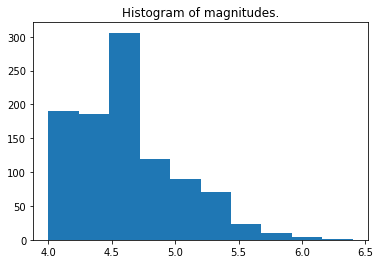

In [14]:
# Visualization
plt.hist(mag)
plt.title("Histogram of magnitudes.")
plt.show()

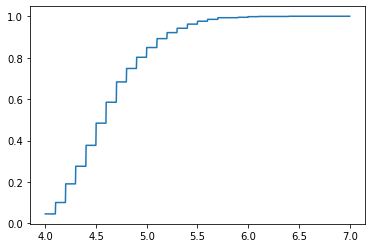

In [15]:
x_space = np.linspace(4, 7, 1000)
ecdf = ECDF(mag)
plt.plot(x_space, ecdf(x_space))

alphs_hat_n =  131.59473491335265
beta_hat_n =  28.48124294722376


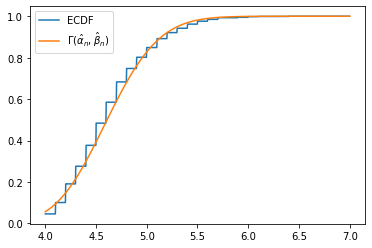

In [16]:
alpha_hat_n = mean**2 / variance
beta_hat_n = mean / variance
print("alphs_hat_n = ", alpha_hat_n)
print("beta_hat_n = ", beta_hat_n)
plt.plot(x_space, ecdf(x_space), label="ECDF")
plt.plot(x_space, stats.gamma.cdf(x_space, a=alpha_hat_n, scale=1/beta_hat_n),\
    label=r"$\Gamma(\hat{\alpha}_n, \hat{\beta}_n)$")

plt.legend()
plt.show()


### Observations
* The empirical CDF is more or less a step function
* It, however, simulates the actual CDF very well.